ЦПТ своими руками: распределение Beta Prime

https://en.wikipedia.org/wiki/Beta_prime_distribution

1. Рисуем кривую плотности для общего ознакомления с распределением.

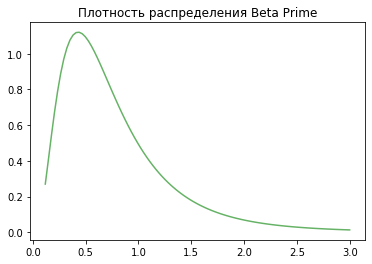

In [99]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, ax = plt.subplots(1,1)

#параметры распределения
a = 4
b = 6

x = np.linspace(stats.betaprime.ppf(0.01, a, b), stats.betaprime.ppf(0.99, a, b), 100)
plt.plot(x, stats.betaprime.pdf(x, a, b), 'g-', alpha=0.6)
plt.title("Плотность распределения Beta Prime")
plt.show()

2. Генерируем выборку, строим гистограмму и сравниваем с теоретической кривой.

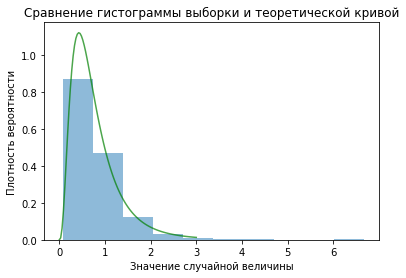

In [100]:
r = np.array(stats.betaprime.rvs(a, b, size=1000))
x = np.linspace(0, 3.0, 100)
plt.hist(r, histtype='stepfilled',rwidth=0.5, alpha=0.5, density=True)
plt.plot(x, stats.betaprime.pdf(x, a, b), 'g-', alpha=0.7)
plt.title("Сравнение гистограммы выборки и теоретической кривой")
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.show()

3. Генерируем коллекции по 1000 выборок по n элементов, с n=5, n=10, n=100, строим гистограммы их выборочных средних

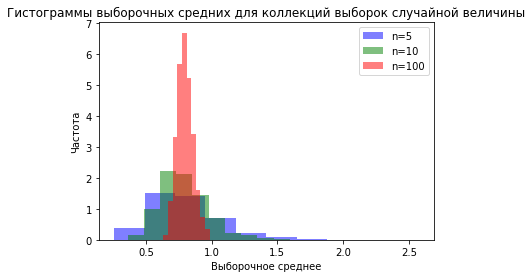

In [101]:
#1000 выборок размером n
def sample_ds(n): return [stats.betaprime.rvs(a,b,size=n) for i in range(1000)]

#1000 выборочных средних для выборок размером n
def sample_hist(n): return [1/len(ds)*sum(ds) for ds in sample_ds(n)]

n5, n10, n100 = (sample_hist(5), sample_hist(10), sample_hist(100))

plt.hist(n5,  density=True, alpha=0.5, color='blue')
plt.hist(n10,  density=True, alpha=0.5,  color='green')
plt.hist(n100,  density=True, alpha=0.5, color='red')
plt.xlabel('Выборочное среднее')
plt.ylabel('Частота')
plt.legend(['n=5','n=10','n=100'])
plt.title('Гистограммы выборочных средних для коллекций выборок случайной величины')
plt.show()

4. Посчитаем теоретические параметры и параметры норм. распределения для каждого случая

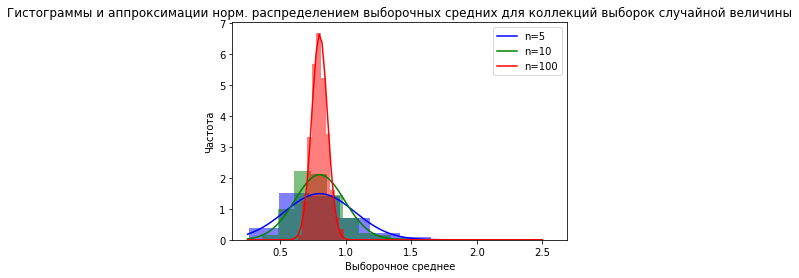

In [104]:
#теоретические параметры
mean, variance = stats.betaprime.stats(a, b, moments='mv')

import math

#нормальные распределения будут иметь параметры N = mean, sigma = math.sqrt(variance/n)
#построим их на графике выше

plt.hist(n5,  density=True, alpha=0.5, color='blue')
plt.hist(n10,  density=True, alpha=0.5,  color='green')
plt.hist(n100,  density=True, alpha=0.5, color='red')
x = np.linspace(0.25, 2.5, 100)
plt.plot(x, stats.norm.pdf(x, mean, math.sqrt(variance/5)), 'b-', x, stats.norm.pdf(x, mean, math.sqrt(variance/10)), 'g-', x, stats.norm.pdf(x, mean, math.sqrt(variance/100)), 'r-')
plt.xlabel('Выборочное среднее')
plt.ylabel('Частота')
plt.legend(['n=5','n=10','n=100'])
plt.title('Гистограммы и аппроксимации норм. распределением выборочных средних для коллекций выборок случайной величины')
plt.show()

5. Как видим, ЦПТ прекрасно работает, что и требовалось доказать. Точность аппроксимации с ростом размера выборки n зримо растет.